<a href="https://colab.research.google.com/github/axrd/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/DS_Unit_2_Sprint_1_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [49]:
from math import sqrt

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]


def mean(list):
  return sum(list)/len(list)

def variance(list):
  mean = sum(list)/len(list)
  variance = 0
  for i in range(0,len(list)):
    variance += (mean - list[i])**2
  return variance/len(list)
  
def std(list):  
  return sqrt(variance(list))
  


print(mean(sales))
print(variance(sales))
print(std(sales))

3052.714285714286
183761.06122448976
428.67360686714756
183761.06122448976


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [42]:
import numpy as np
import pandas as pd

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

visitors = [127,80,105,92,120,115,93]

store = {"sales": sales, "visitors": visitors}

df = pd.DataFrame(store)

df.cov()


,sales,visitors
sales,214387.904762,7604.357143
visitors,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [60]:
std_sales = std(sales)
std_visitors = std(visitors)

# Double-checking St Dev with built-on Numpy methods:
print(std_sales, std_visitors)
print(np.std(sales), np.std(visitors))

standardizer = np.array([[std_sales **2, std_sales * std_visitors], [std_sales * std_visitors, std_visitors ** 2]])

corr_coeff = np.divide(df.cov(),standardizer)

print(corr_coeff)
print("\n")
print(np.corrcoef(sales, visitors))


428.67360686714756 15.792015549069118
428.67360686714756 15.792015549069118
             sales  visitors
sales     1.166667  1.123306
visitors  1.123306  1.166667


[[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [69]:
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")


df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [71]:
# Dropping unnamed index column:
df.drop(["Unnamed: 0"], axis=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
5,1.0,1.0,"Anderson, Mr. Harry",male,48.000000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.000000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.000000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0


In [77]:
df_numeric = pd.DataFrame(data = df, columns= ['pclass', 'survived', 'age', 'sibsp', 'parch', 'ticket', 'fare'])
df_numeric.head()

,pclass,survived,age,sibsp,parch,ticket,fare
0,1.0,1.0,29.0000,0.0,0.0,24160,211.3375
1,1.0,1.0,0.9167,1.0,2.0,113781,151.5500
2,1.0,0.0,2.0000,1.0,2.0,113781,151.5500
3,1.0,0.0,30.0000,1.0,2.0,113781,151.5500
4,1.0,0.0,25.0000,1.0,2.0,113781,151.5500


In [78]:
df_numeric.cov()

,pclass,survived,age,sibsp,parch,fare
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738


In [80]:
df_numeric.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

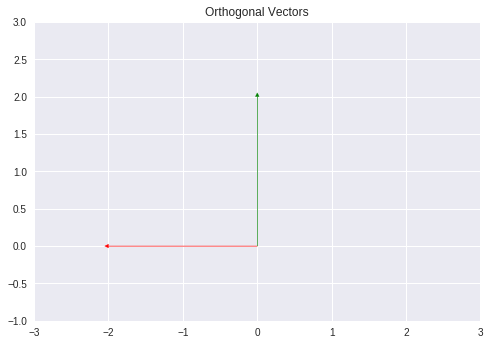


 'Orthogonal' is synonymous with 'Perpendicular'.


In [96]:
import matplotlib.pyplot as plt

vector_1 = [-2, 0]
vector_2 = [0, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

print("\n 'Orthogonal' is synonymous with 'Perpendicular'.")

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [99]:
a_vec = np.array([-5,3,7])
b_vec = np.array([6,-8,2])

np.dot(a_vec, b_vec)

print("No, they are not. The Dot Product != 0.")

No, they are not. The Dot Product != 0


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c_vec = np.array([2,-15,6,20])

In [106]:
c_vec_norm_squared = np.linalg.norm(c_vec)**2

c_vec_squared = np.dot(c_vec,c_vec)

c_vec_T_c = np.dot(np.transpose(c_vec), c_vec)

print(c_vec_norm_squared)
print(c_vec_squared)
print(c_vec_T_c)
print("They are all the same value.")

665.0
665
665
They are all the same value.


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

**d** can be deconstructed as follows: 
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

***e*** can be deconstructed as follows: 
\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix} -8 \begin{bmatrix} 0 \\ 0 \\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [109]:
# First we calculate the norm for vector f:

f = np.array([4,12,11,9,2])
f_norm = np.linalg.norm(f)
f_unit = np.divide(f, f_norm)
print(f_unit)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

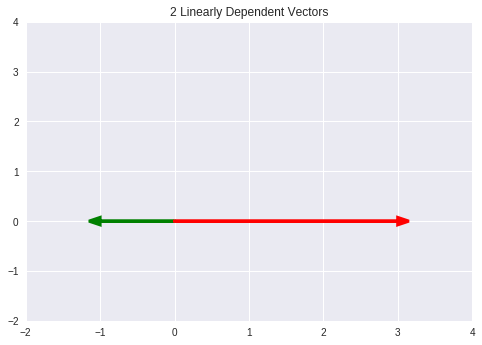

In [121]:
# 2 Vectors that are linearly dependent:

plt.xlim(-2,4)          
plt.ylim(-2,4)

v1 = [-1,0] 
v2 = [3,0]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals


plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.15, head_length=0.15, color ='green')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.15, head_length=0.15, color ='red')

plt.title("2 Linearly Dependent Vectors")
plt.show()

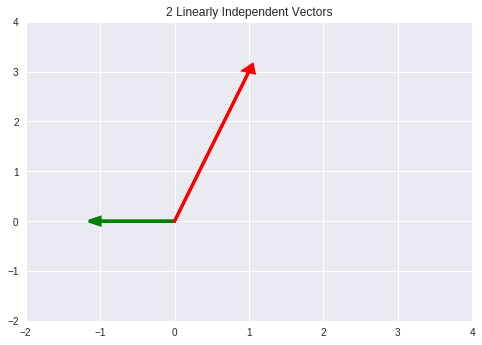

In [123]:
# 2 Vectors that are linearly independent:

plt.xlim(-2,4)          
plt.ylim(-2,4)

v1 = [-1,0] 
v2 = [1,3]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals


plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.15, head_length=0.15, color ='green')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.15, head_length=0.15, color ='red')

plt.title("2 Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

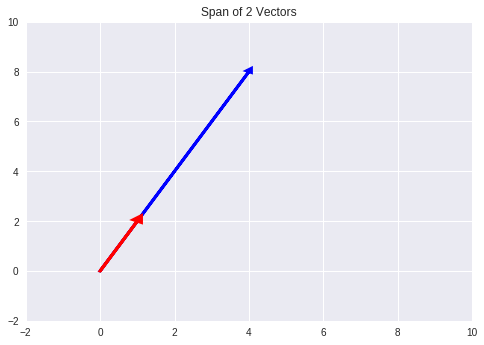

In [129]:
# Visualizing the span of 2 vectors

plt.xlim(-2,10)          
plt.ylim(-2,10)

v1 = [1,2] 
v2 = [4,8]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.15, head_length=0.15, color ='blue')
plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.25, head_length=0.25, color ='red')


plt.title("Span of 2 Vectors")
plt.show()

**SInce they're on the same line, the span of these 2 vectors is the line they create.**

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:2541: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


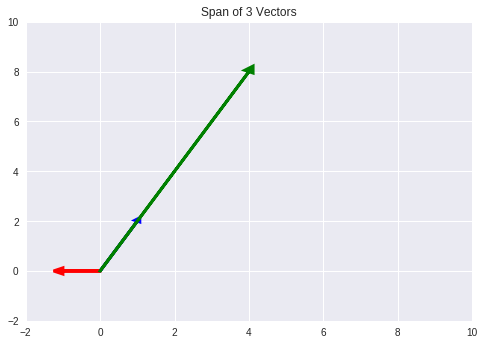

In [131]:
# Visualizing the span of 3 vectors

plt.xlim(-2,10)          
plt.ylim(-2,10)

v1 = [1,2,3] 
v2 = [-1,0,7]
v3 = [4,8,2]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.arrow(0,0, v1[0], v1[1], v1[2], linewidth=3, head_width=.15, head_length=0.15, color ='blue')
plt.arrow(0,0, v2[0], v2[1], v2[2], linewidth=3, head_width=.25, head_length=0.25, color ='red')
plt.arrow(0,0, v3[0], v3[1], v3[2], linewidth=3, head_width=.25, head_length=0.25, color ='green')


plt.title("Span of 3 Vectors")
plt.show()

**Since there is 1 vector '*m*' that is independent, the span is** $\mathbb{R}^3$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



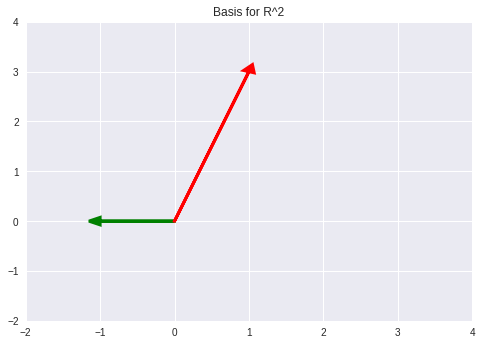

In [132]:
# 2 Vectors that are linearly independent:

plt.xlim(-2,4)          
plt.ylim(-2,4)

v1 = [-1,0] 
v2 = [1,3]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals


plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.15, head_length=0.15, color ='green')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.15, head_length=0.15, color ='red')

plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

The basis of a vector space ***V*** is a set of vectors that are linearly independent and that span the vector space ***V***.

A set of vectors spans a space if their linear combinations fill the space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**First we need to reduce it to it's Row-Echelon form, then count the number of non-zero rows it has. We can reduce it down to:**

\begin{align}
P = \begin{bmatrix} 
1 & 0 & 0 \\
 0 & 1 & 0 \\
0 & 0  & 1
\end{bmatrix}
\end{align}


**This is the identity matrix. Basically every vector is linearly independent from the rest. **

## 7.2 What does the rank of a matrix tell us?

The dimensionality of the space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

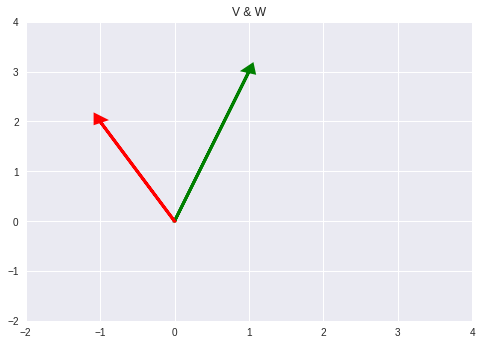

In [134]:
# Visualizing vectors:

plt.xlim(-2,4)          
plt.ylim(-2,4)

v = [1,3] 
w = [-1,2]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals


plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.15, head_length=0.15, color ='green')
plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.15, head_length=0.15, color ='red')

plt.title("V & W")
plt.show()

We can use the equation: 

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

for the projection of any vector $w$ onto any line $L$.


In [136]:
proj_L_w = np.dot(np.divide(np.dot(w, v), np.dot(v,v)),v)
print(proj_L_w)

[0.5 1.5]


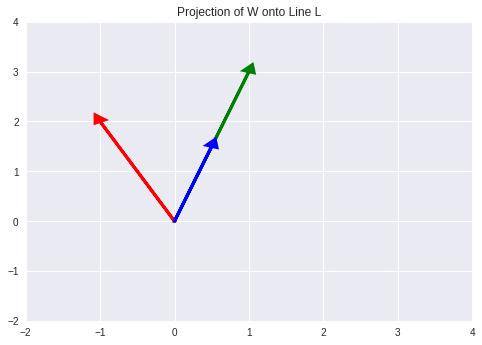

In [138]:
# Visualizing vectors:

plt.xlim(-2,4)          
plt.ylim(-2,4)

v = [1,3] 
w = [-1,2]
p = [0.5,1.5]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals


plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.15, head_length=0.15, color ='green')
plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.15, head_length=0.15, color ='red')
plt.arrow(0,0, p[0], p[1], linewidth=3, head_width=.15, head_length=0.15, color ='blue')


plt.title("Projection of W onto Line L")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

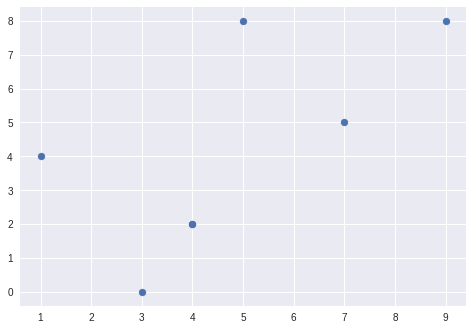

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()